In [1]:
import os

In [2]:
import numpy
import pandas
import seaborn
from matplotlib import pyplot

In [3]:
d = '../data/data_folds/'
os.listdir(d)

['data_test_0.xlsx',
 'data_test_1.xlsx',
 'data_test_2.xlsx',
 'data_test_3.xlsx',
 'data_test_4.xlsx',
 'data_test_5.xlsx',
 'data_test_6.xlsx',
 'data_test_7.xlsx',
 'data_test_8.xlsx',
 'data_test_9.xlsx',
 'data_test_A229RX0_0.xlsx',
 'data_test_A229RX0_1.xlsx',
 'data_test_A229RX0_2.xlsx',
 'data_test_A229RX0_3.xlsx',
 'data_test_A229RX0_4.xlsx',
 'data_test_A229RX0_5.xlsx',
 'data_test_A229RX0_6.xlsx',
 'data_test_A229RX0_7.xlsx',
 'data_test_A229RX0_8.xlsx',
 'data_test_A229RX0_9.xlsx',
 'data_test_AAA_0.xlsx',
 'data_test_AAA_1.xlsx',
 'data_test_AAA_2.xlsx',
 'data_test_AAA_3.xlsx',
 'data_test_AAA_4.xlsx',
 'data_test_AAA_5.xlsx',
 'data_test_AAA_6.xlsx',
 'data_test_AAA_7.xlsx',
 'data_test_AAA_8.xlsx',
 'data_test_AAA_9.xlsx',
 'data_test_AIRRTMFMD11_0.xlsx',
 'data_test_AIRRTMFMD11_1.xlsx',
 'data_test_AIRRTMFMD11_2.xlsx',
 'data_test_AIRRTMFMD11_3.xlsx',
 'data_test_AIRRTMFMD11_4.xlsx',
 'data_test_AIRRTMFMD11_5.xlsx',
 'data_test_AIRRTMFMD11_6.xlsx',
 'data_test_AIRRTMF

In [4]:
os.chdir('../')
os.listdir('./')

['.env',
 '.git',
 '.gitignore',
 '.idea',
 'data',
 'LICENSE',
 'macro',
 'notebooks',
 'pp.png',
 'pyproject.toml',
 'r',
 'README.md',
 'setup.cfg']

In [5]:
from macro.new_base_truegarage import r2_metric, kendalltau_metric, somersd_metric

In [6]:
dd = './data/data_folds/data_{0}_{2}_{1}.xlsx'
dd

'./data/data_folds/data_{0}_{2}_{1}.xlsx'

In [7]:
j = 4
base_driver = "AAA"

In [8]:
role = 'train'
data_train = pandas.read_excel(dd.format(role, j, base_driver))
data_train = data_train.rename(columns={'Unnamed: 0': 'date'})
data_train['date'] = pandas.to_datetime(data_train['date'])
data_train = data_train.set_index('date')
data_train.head(5)

,AAA__mean1x3_div_pct,AAA__mean1x6_div_pct,AAA__mean1x12_div_pct,AAA__mean3x6_div_pct,AAA__mean3x12_div_pct,AAA__pct_shift1,AAA__pct_shift3,AAA__pct_shift6,AAA__pct_shift12,AAA__median1x3_div_pct,...,AAA__predictors_linreg_lag3,AAA__predictors_linreg_lag3.1,AAA__predictors_linreg_lag3.2,AAA__predictors_linreg_lag3.3,AAA__predictors_elastic_lag3,AAA__predictors_elastic_lag3.1,AAA__predictors_elastic_lag3.2,AAA__predictors_elastic_lag3.3,AAA,TLT_aggmean_pct
date,,,,,,,,,,,,,,,,,,,,,
2011-12-01 00:00:00+00:00,0.313725,0.568627,0.392157,0.254902,0.078431,0.015385,-0.039906,-0.238796,-0.244790,0.450980,...,-0.004486,-0.004486,-0.004486,-0.004486,-0.007148,-0.007148,-0.007148,-0.007148,3.93,NaN
2012-01-01 00:00:00+00:00,-0.098039,0.176471,0.039216,0.274510,0.137255,-0.020566,-0.033209,-0.247266,-0.269333,0.000000,...,-0.017860,-0.017860,-0.017860,-0.017860,-0.007148,-0.007148,-0.007148,-0.007148,3.85,-0.007132
2012-02-01 00:00:00+00:00,0.029412,0.225490,0.264706,0.196078,0.235294,0.000000,-0.005181,-0.126690,-0.304424,0.000000,...,0.001076,0.001076,0.001076,0.001076,-0.007148,-0.007148,-0.007148,-0.007148,3.85,-0.012369
2012-03-01 00:00:00+00:00,0.294118,0.392157,0.568627,0.098039,0.274510,0.035718,0.015152,-0.024754,-0.251314,0.343137,...,0.000152,0.000152,0.000152,0.000152,-0.007148,-0.007148,-0.007148,-0.007148,3.99,-0.029696
2012-04-01 00:00:00+00:00,-0.235294,-0.039216,0.176471,0.196078,0.411765,-0.007547,0.028171,-0.005038,-0.264693,-0.068627,...,-0.009375,-0.009375,-0.009375,-0.009375,-0.007148,-0.007148,-0.007148,-0.007148,3.96,0.017544


In [9]:
role = 'test'
data_test = pandas.read_excel(dd.format(role, j, base_driver))
data_test = data_test.rename(columns={'Unnamed: 0': 'date'})
data_test['date'] = pandas.to_datetime(data_test['date'])
data_test = data_test.set_index('date')
data_test.head(5)

,AAA__mean1x3_div_pct,AAA__mean1x6_div_pct,AAA__mean1x12_div_pct,AAA__mean3x6_div_pct,AAA__mean3x12_div_pct,AAA__pct_shift1,AAA__pct_shift3,AAA__pct_shift6,AAA__pct_shift12,AAA__median1x3_div_pct,...,AAA__predictors_linreg_lag3,AAA__predictors_linreg_lag3.1,AAA__predictors_linreg_lag3.2,AAA__predictors_linreg_lag3.3,AAA__predictors_elastic_lag3,AAA__predictors_elastic_lag3.1,AAA__predictors_elastic_lag3.2,AAA__predictors_elastic_lag3.3,AAA,TLT_aggmean_pct
date,,,,,,,,,,,,,,,,,,,,,
2015-04-01 00:00:00+00:00,-0.392157,-0.176471,-0.215686,0.215686,0.176471,-0.032967,0.017341,-0.102041,-0.169811,-0.490196,...,-0.003728,-0.003728,-0.003728,-0.003728,-0.007148,-0.007148,-0.007148,-0.007148,3.52,NaN
2015-05-01 00:00:00+00:00,0.156863,0.450980,0.509804,0.294118,0.352941,0.130682,0.102493,0.015306,-0.043269,0.313725,...,0.033009,0.033009,0.033009,0.033009,-0.007148,-0.007148,-0.007148,-0.007148,3.98,-0.065105
2015-06-01 00:00:00+00:00,0.000000,0.235294,0.470588,0.235294,0.470588,0.052764,0.151099,0.105541,-0.014118,0.000000,...,-0.009163,-0.009163,-0.009163,-0.009163,-0.007148,-0.007148,-0.007148,-0.007148,4.19,-0.027980
2015-07-01 00:00:00+00:00,-0.549020,-0.411765,-0.078431,0.137255,0.470588,-0.009547,0.178977,0.199422,-0.002404,-0.549020,...,0.018331,0.018331,0.018331,0.018331,-0.007148,-0.007148,-0.007148,-0.007148,4.15,0.010486
2015-08-01 00:00:00+00:00,-0.313725,-0.470588,-0.235294,-0.156863,0.078431,-0.026506,0.015075,0.119114,-0.009804,-0.156863,...,0.001706,0.001706,0.001706,0.001706,-0.007148,-0.007148,-0.007148,-0.007148,4.04,0.040148


In [10]:
target = 'TLT_aggmean_pct'

C:\Users\Edward\AppData\Local\Temp\ipykernel_25552\3282425986.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=30)
C:\Users\Edward\AppData\Local\Temp\ipykernel_25552\3282425986.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=30)


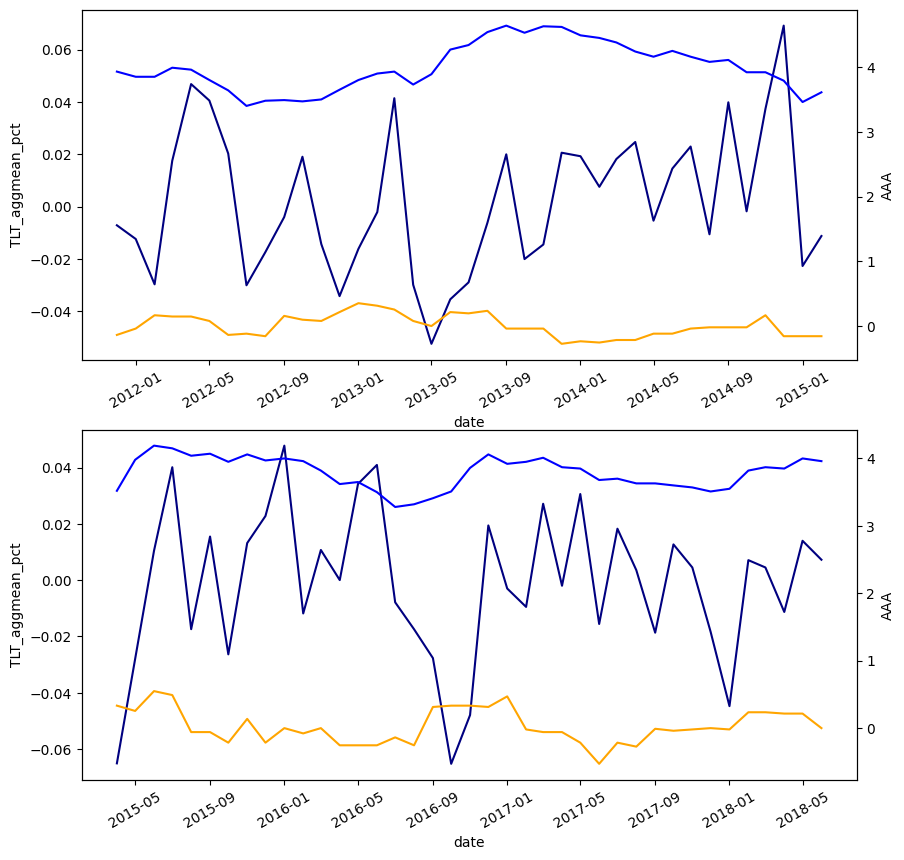

In [22]:
driver_baseline = 'AAA'
driver_candidate = 'AAA__median3x12_div_pct'
# driver_candidate = 'AAA__mean1x3_div_pct'
# driver_candidate = 'AAA__pct_shift1'


fig, ax = pyplot.subplots(2, 1, figsize=(10, 10))

ax_twin_0 = ax[0].twinx()
seaborn.lineplot(
    x=data_train.index[:-1], 
    y=data_train[target].iloc[1:],
    color='navy', 
    ax=ax[0]
)
seaborn.lineplot(
    x=data_train.index[:-1], 
    y=data_train[driver_baseline].iloc[:-1],
    color='blue', 
    ax=ax_twin_0
)
seaborn.lineplot(
    x=data_train.index[:-1], 
    y=data_train[driver_candidate].iloc[:-1],
    color='orange', 
    ax=ax_twin_0
)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=30)

ax_twin_1 = ax[1].twinx()
seaborn.lineplot(
    x=data_test.index[:-1], 
    y=data_test[target].iloc[1:],
    color='navy', 
    ax=ax[1]
)
seaborn.lineplot(
    x=data_test.index[:-1], 
    y=data_test[driver_baseline].iloc[:-1],
    color='blue', 
    ax=ax_twin_1
)
seaborn.lineplot(
    x=data_test.index[:-1], 
    y=data_test[driver_candidate].iloc[:-1],
    color='orange', 
    ax=ax_twin_1
)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=30)
print()

In [23]:
summary = pandas.DataFrame(data={'r2': [r2_metric(x=data_train[driver_baseline].iloc[:-1].values, y=data_train[target].iloc[1:].values),
                                        r2_metric(x=data_test[driver_baseline].iloc[:-1].values, y=data_test[target].iloc[1:].values)],
                                 'kendall': [kendalltau_metric(x=data_train[driver_baseline].iloc[:-1].values, y=data_train[target].iloc[1:].values),
                                             kendalltau_metric(x=data_test[driver_baseline].iloc[:-1].values, y=data_test[target].iloc[1:].values)], 
                                 'somersd': [somersd_metric(x=data_train[driver_baseline].iloc[:-1].values, y=data_train[target].iloc[1:].values),
                                             somersd_metric(x=data_test[driver_baseline].iloc[:-1].values, y=data_test[target].iloc[1:].values)]},
                           index=['train', 'test'])
print(driver_baseline)
summary

AAA


,r2,kendall,somersd
train,-22149.158036,0.157076,0.156545
test,-20291.480773,0.274275,0.272605


In [24]:
summary = pandas.DataFrame(data={'r2': [r2_metric(x=data_train[driver_candidate].iloc[:-1].values, y=data_train[target].iloc[1:].values),
                                        r2_metric(x=data_test[driver_candidate].iloc[:-1].values, y=data_test[target].iloc[1:].values)],
                                 'kendall': [kendalltau_metric(x=data_train[driver_candidate].iloc[:-1].values, y=data_train[target].iloc[1:].values),
                                             kendalltau_metric(x=data_test[driver_candidate].iloc[:-1].values, y=data_test[target].iloc[1:].values)], 
                                 'somersd': [somersd_metric(x=data_train[driver_candidate].iloc[:-1].values, y=data_train[target].iloc[1:].values),
                                             somersd_metric(x=data_test[driver_candidate].iloc[:-1].values, y=data_test[target].iloc[1:].values)]},
                           index=['train', 'test'])
print(driver_candidate)
summary

AAA__median3x12_div_pct


,r2,kendall,somersd
train,-41.030973,-0.120478,-0.118758
test,-91.381329,-0.152925,-0.149798


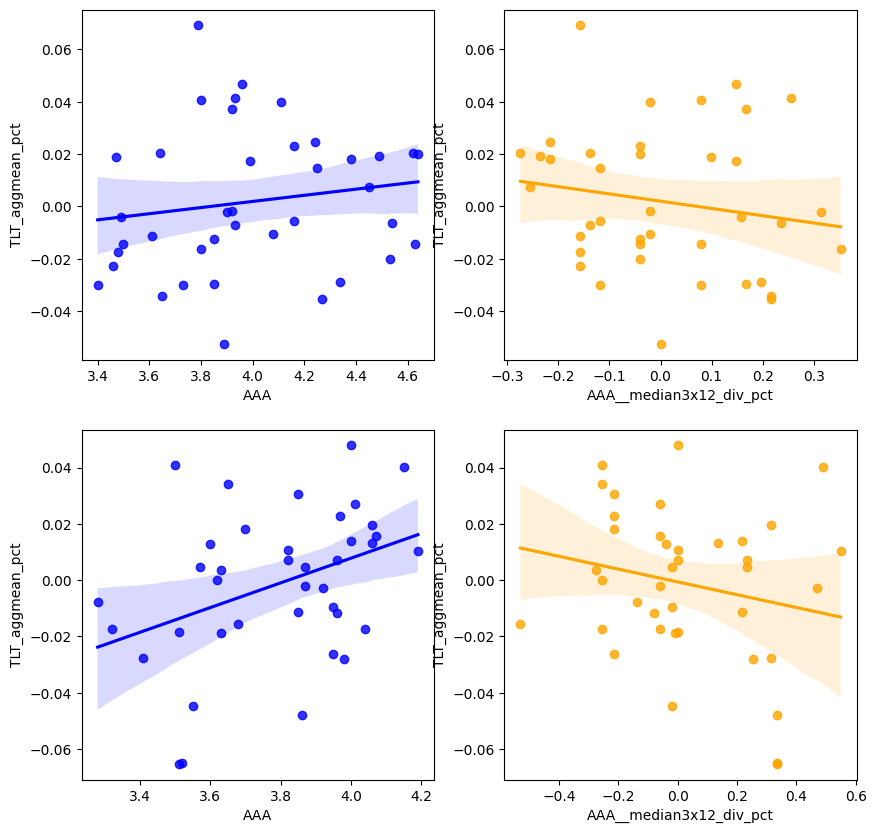

In [25]:
driver_baseline = 'AAA'
driver_candidate = 'AAA__median3x12_div_pct'
# driver_candidate = 'AAA__mean1x3_div_pct'
# driver_candidate = 'AAA__pct_shift1'


fig, ax = pyplot.subplots(2, 2, figsize=(10, 10))
seaborn.regplot(
    x=data_train[driver_baseline].iloc[:-1], 
    y=data_train[target].iloc[1:],
    ax=ax[0, 0],
    color='blue'
)
seaborn.regplot(
    x=data_train[driver_candidate].iloc[:-1], 
    y=data_train[target].iloc[1:],
    ax=ax[0, 1],
    color='orange'
)
seaborn.regplot(
    x=data_test[driver_baseline].iloc[:-1], 
    y=data_test[target].iloc[1:],
    ax=ax[1, 0],
    color='blue'
)
seaborn.regplot(
    x=data_test[driver_candidate].iloc[:-1], 
    y=data_test[target].iloc[1:],
    ax=ax[1, 1],
    color='orange'
)
print()

In [151]:
from macro.new_base_test_projectors import aUGMARIMAClass as UGMARIMAClass, aAutoArima as AutoArima

In [152]:
arima_kwg = {"model": AutoArima, "model_kwargs": {}, "window": 6}
arima_kwg

{'model': macro.new_base_test_projectors.aAutoArima,
 'model_kwargs': {},
 'window': 6}

In [153]:
model = UGMARIMAClass(**arima_kwg)

In [154]:
series_first = {target: data_train[target]}
series_second = {target: data_test[target]}

In [155]:
result_first = model.project_first(series_first)

prep 0.00405430793762207


C:\TET\env\macro_new\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\TET\env\macro_new\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\TET\env\macro_new\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\TET\env\macro_new\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\TET\env\macro_new\Lib\site-packages\statsmo

fit 1.1583948135375977
cast 0.0


In [156]:
result_second = model.project_second(series_second)

In [157]:
result_first

date
2011-12-01 00:00:00+00:00         NaN
2012-01-01 00:00:00+00:00   -0.004985
2012-02-01 00:00:00+00:00    0.003949
2012-03-01 00:00:00+00:00    0.008155
2012-04-01 00:00:00+00:00   -0.009448
2012-05-01 00:00:00+00:00   -0.006550
2012-06-01 00:00:00+00:00   -0.010086
2012-07-01 00:00:00+00:00   -0.016760
2012-08-01 00:00:00+00:00    0.023742
2012-09-01 00:00:00+00:00   -0.020045
2012-10-01 00:00:00+00:00    0.015696
2012-11-01 00:00:00+00:00   -0.010703
2012-12-01 00:00:00+00:00    0.026368
2013-01-01 00:00:00+00:00   -0.007700
2013-02-01 00:00:00+00:00    0.017430
2013-03-01 00:00:00+00:00   -0.012719
2013-04-01 00:00:00+00:00   -0.009612
2013-05-01 00:00:00+00:00    0.025811
2013-06-01 00:00:00+00:00    0.014452
2013-07-01 00:00:00+00:00   -0.006537
2013-08-01 00:00:00+00:00    0.024365
2013-09-01 00:00:00+00:00   -0.013318
2013-10-01 00:00:00+00:00    0.002332
2013-11-01 00:00:00+00:00    0.006818
2013-12-01 00:00:00+00:00   -0.007114
2014-01-01 00:00:00+00:00   -0.005212
2014-02

In [158]:
result_second

date
2015-04-01 00:00:00+00:00    0.008009
2015-05-01 00:00:00+00:00    0.043249
2015-06-01 00:00:00+00:00   -0.018470
2015-07-01 00:00:00+00:00    0.012938
2015-08-01 00:00:00+00:00   -0.023990
2015-09-01 00:00:00+00:00    0.025119
2015-10-01 00:00:00+00:00   -0.035180
2015-11-01 00:00:00+00:00    0.042600
2015-12-01 00:00:00+00:00   -0.047410
2016-01-01 00:00:00+00:00    0.036981
2016-02-01 00:00:00+00:00   -0.036905
2016-03-01 00:00:00+00:00    0.012205
2016-04-01 00:00:00+00:00   -0.020991
2016-05-01 00:00:00+00:00    0.016022
2016-06-01 00:00:00+00:00   -0.020609
2016-07-01 00:00:00+00:00    0.009026
2016-08-01 00:00:00+00:00   -0.006341
2016-09-01 00:00:00+00:00    0.008062
2016-10-01 00:00:00+00:00   -0.003482
2016-11-01 00:00:00+00:00    0.015472
2016-12-01 00:00:00+00:00   -0.007563
2017-01-01 00:00:00+00:00    0.001600
2017-02-01 00:00:00+00:00   -0.000307
2017-03-01 00:00:00+00:00    0.002478
2017-04-01 00:00:00+00:00   -0.007409
2017-05-01 00:00:00+00:00    0.005831
2017-06

In [159]:
model.model.max_window, model.model.max_d, model.model.arima, model.model.fitted_p, model.model.fitted_d, model.model.fitted_q, model.model.fitted_trend

(6,
 2,
 ARIMA(order=(1, 0, 1), scoring_args={}, with_intercept=False),
 None,
 None,
 None,
 None)

In [160]:
result_first.shape

(40,)

In [161]:
data_train[target].shape

(40,)

In [162]:
result_first_ = data_train[target].values[:-1] * result_first.apply(func=numpy.exp).iloc[1:]
result_first_

date
2012-01-01 00:00:00+00:00    3.910457
2012-02-01 00:00:00+00:00    3.865235
2012-03-01 00:00:00+00:00    3.881525
2012-04-01 00:00:00+00:00    3.952478
2012-05-01 00:00:00+00:00    3.934147
2012-06-01 00:00:00+00:00    3.761865
2012-07-01 00:00:00+00:00    3.579502
2012-08-01 00:00:00+00:00    3.481688
2012-09-01 00:00:00+00:00    3.410938
2012-10-01 00:00:00+00:00    3.545210
2012-11-01 00:00:00+00:00    3.433057
2012-12-01 00:00:00+00:00    3.593516
2013-01-01 00:00:00+00:00    3.622002
2013-02-01 00:00:00+00:00    3.866816
2013-03-01 00:00:00+00:00    3.850709
2013-04-01 00:00:00+00:00    3.892405
2013-05-01 00:00:00+00:00    3.827527
2013-06-01 00:00:00+00:00    3.946628
2013-07-01 00:00:00+00:00    4.242180
2013-08-01 00:00:00+00:00    4.447043
2013-09-01 00:00:00+00:00    4.479939
2013-10-01 00:00:00+00:00    4.650835
2013-11-01 00:00:00+00:00    4.560990
2013-12-01 00:00:00+00:00    4.597181
2014-01-01 00:00:00+00:00    4.595985
2014-02-01 00:00:00+00:00    4.494892
2014-03

In [163]:
result_second_ = data_test[target].values[:-1] * result_second.apply(func=numpy.exp).iloc[1:]
result_second_

date
2015-05-01 00:00:00+00:00    3.675578
2015-06-01 00:00:00+00:00    3.907164
2015-07-01 00:00:00+00:00    4.244562
2015-08-01 00:00:00+00:00    4.051628
2015-09-01 00:00:00+00:00    4.142766
2015-10-01 00:00:00+00:00    3.929307
2015-11-01 00:00:00+00:00    4.121904
2015-12-01 00:00:00+00:00    3.872008
2016-01-01 00:00:00+00:00    4.119562
2016-02-01 00:00:00+00:00    3.855071
2016-03-01 00:00:00+00:00    4.008628
2016-04-01 00:00:00+00:00    3.740650
2016-05-01 00:00:00+00:00    3.678467
2016-06-01 00:00:00+00:00    3.575548
2016-07-01 00:00:00+00:00    3.531733
2016-08-01 00:00:00+00:00    3.259268
2016-09-01 00:00:00+00:00    3.346874
2016-10-01 00:00:00+00:00    3.398147
2016-11-01 00:00:00+00:00    3.564730
2016-12-01 00:00:00+00:00    3.830917
2017-01-01 00:00:00+00:00    4.066502
2017-02-01 00:00:00+00:00    3.918798
2017-03-01 00:00:00+00:00    3.959802
2017-04-01 00:00:00+00:00    3.980399
2017-05-01 00:00:00+00:00    3.892633
2017-06-01 00:00:00+00:00    3.804812
2017-07

In [164]:
result_first_.head(5)

date
2012-01-01 00:00:00+00:00    3.910457
2012-02-01 00:00:00+00:00    3.865235
2012-03-01 00:00:00+00:00    3.881525
2012-04-01 00:00:00+00:00    3.952478
2012-05-01 00:00:00+00:00    3.934147
Name: AAA, dtype: float64

In [165]:
data_train.head(5)

,A229RX0,AAA,AIRRTMFMD11,AWHAERT,AWHMAN,BAA,AWHAERT__p901x12_div_pct,AWHAERT__p101x12_div_pct,TLT_aggmean_pct
date,,,,,,,,,
2011-12-01 00:00:00+00:00,39008,3.93,3057860,31.700001,41.599998,5.25,-0.323529,0.264706,0.008371
2012-01-01 00:00:00+00:00,39253,3.85,2882127,31.900000,41.799999,5.23,0.000000,0.558824,-0.007132
2012-02-01 00:00:00+00:00,39466,3.85,3151721,31.900000,41.799999,5.14,-0.343137,0.215686,-0.012369
2012-03-01 00:00:00+00:00,39590,3.99,3104707,31.900000,41.599998,5.23,-0.343137,0.215686,-0.029696
2012-04-01 00:00:00+00:00,39744,3.96,3020817,31.600000,41.700001,5.19,-0.823529,-0.098039,0.017544


C:\Users\Edward\AppData\Local\Temp\ipykernel_11664\3892044288.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30)


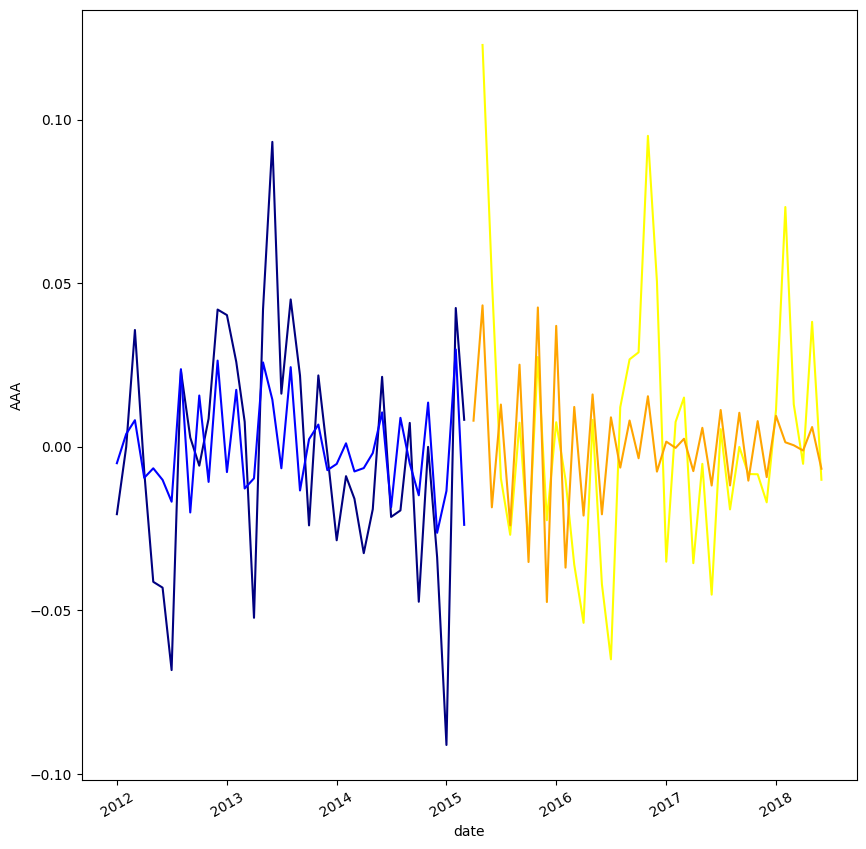

In [166]:
fig, ax = pyplot.subplots(figsize=(10, 10))
seaborn.lineplot(
    x=data_train.index, 
    y=(data_train[target].pct_change() + 1).apply(numpy.log),
    color='navy', 
    ax=ax
)
seaborn.lineplot(
    x=data_train.index, 
    y=result_first,
    color='blue', 
    ax=ax
)
seaborn.lineplot(
    x=data_test.index, 
    y=(data_test[target].pct_change() + 1).apply(numpy.log),
    color='yellow', 
    ax=ax
)
seaborn.lineplot(
    x=data_test.index, 
    y=result_second,
    color='orange', 
    ax=ax
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
# ax.set_ylim([30_000, 50_000])
print()

C:\Users\Edward\AppData\Local\Temp\ipykernel_11664\1221071202.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30)


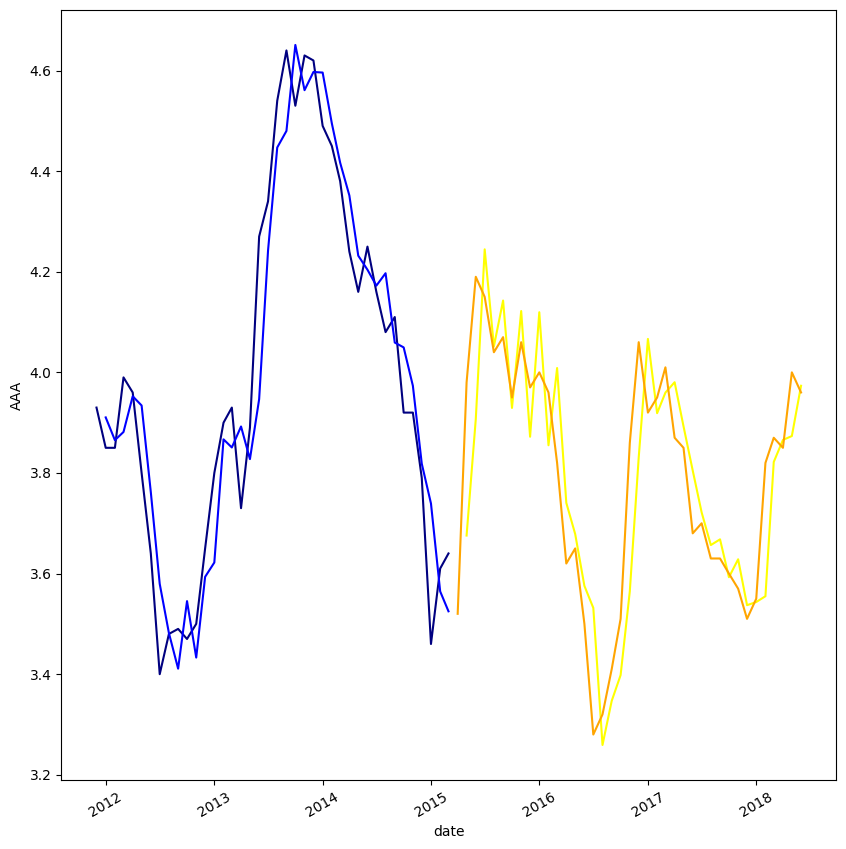

In [167]:
fig, ax = pyplot.subplots(figsize=(10, 10))
seaborn.lineplot(
    x=data_train.index, 
    y=data_train[target],
    color='navy', 
    ax=ax
)
seaborn.lineplot(
    x=data_train.index[1:], 
    y=result_first_,
    color='blue', 
    ax=ax
)
seaborn.lineplot(
    x=data_test.index[1:], 
    y=result_second_,
    color='yellow', 
    ax=ax
)
seaborn.lineplot(
    x=data_test.index, 
    y=data_test[target],
    color='orange', 
    ax=ax
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
print()